In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from pySIVAK import pySIVAK

In [37]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Read data

In [38]:
inputdir = Path(r'../../data_results')

In [39]:
# Input
lock = 'Maasbracht'
scenarios = {
                'SLMSBR KBN 0 - Base, Area': 'REF',
                'SLMSBR KBN 4 - R 40 80 30': 'R 40 80 30',
                'SLMSBR KBN 5 - R 40 80 60': 'R 40 80 60',
                'SLMSBR KBN 6 - R 40 80 90': 'R 40 80 90',
                'SLMSBR KBN 7 - R 60 80 90': 'R 60 80 90',
                'SLMSBR KBN 8 - R 80 80 90': 'R 80 80 90',
                'SLMSBR KBN 9 - R 80 80 110': 'R 80 80 110',
                'SLMSBR KBN 0 - Base, Area beroep 10up': 'Beroepsvaart +10%'
                'SLMSBR KBN 0 - Base, Area beroep 20up': 'Beroepsvaart +20%'
                'SLMSBR KBN 0 - Base, Area recreatie 50down': 'Recreatievaart -50%'
                'SLMSBR KBN 0 - Base, Area recreatie 100down': 'Recreatievaart -100%'
            }

In [40]:
S = {}

for scenario, name in scenarios.items():
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).xlsx'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).xlsx'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).xlsx'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).xlsx'

    S[name] = pySIVAK(ships_file, levelings_file, transit_times_file, summary_file)
    S[name].name = name


# Data analyses

In [68]:
scenario = 'REF'

In [69]:
outputdir = Path('Simulation_results') / lock / scenario
outputdir.mkdir(exist_ok=True, parents=True)

In [95]:
# S[scenario].transit_times.head().T

In [96]:
# S[scenario].levelings.head().T

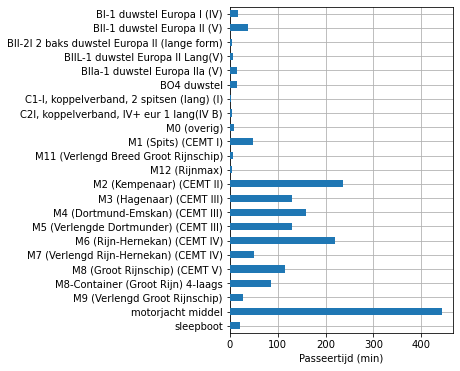

In [73]:
plotdata = S[scenario].transit_times.groupby('Class')['Passage time (hours)'].count()
plotdata.plot.barh(figsize=(4, 6), zorder=3)
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()

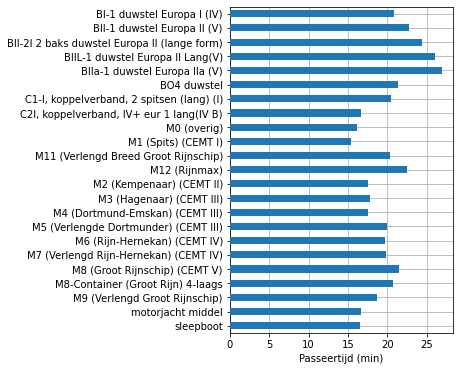

In [74]:
# Difference in ship type
plotdata = S[scenario].transit_times.groupby('Class')['Passage time (hours)'].mean() * 60
plotdata.plot.barh(figsize=(4, 6), zorder=3)
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()

plt.savefig(    outputdir / 'Passeertijd_scheepstype.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_scheepstype.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_scheepstype.csv')

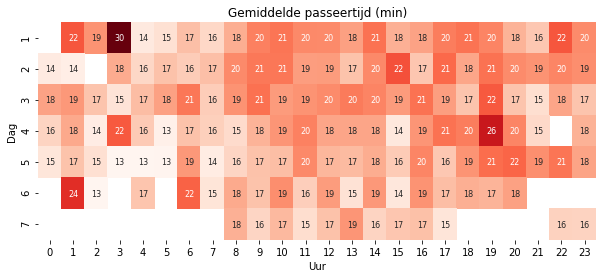

In [75]:
# Difference in weekday
plotdata = S[scenario].passage_time_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Reds', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Gemiddelde passeertijd (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur.csv')

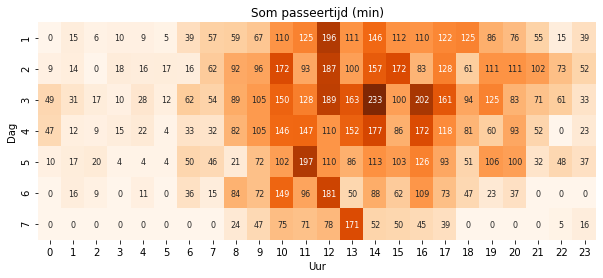

In [76]:
plotdata = S[scenario].passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Oranges', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Som passeertijd (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur_som.csv')

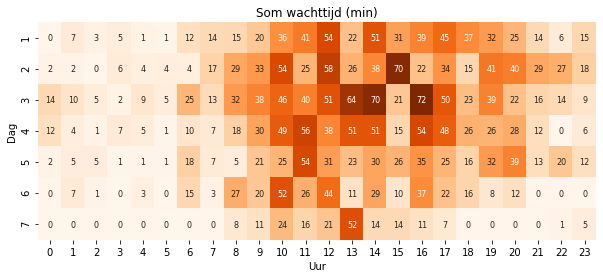

In [77]:
plotdata = S[scenario].passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Oranges', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Som wachttijd (min)')

plt.savefig(    outputdir / 'Wachttijd_dag_uur_som.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Wachttijd_dag_uur_som.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Wachttijd_dag_uur_som.csv')

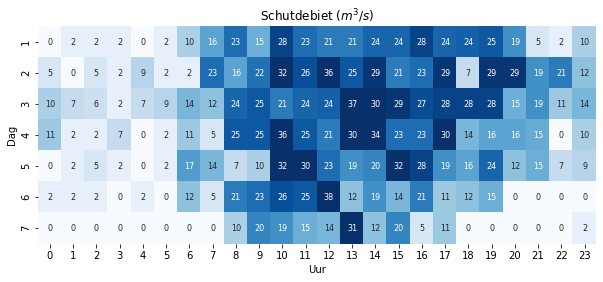

In [78]:
# Difference in weekday
plotdata = S[scenario].waterloss_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Blues', annot=True, fmt='.0f', annot_kws={'size': 8}, vmin=0, vmax=30)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Schutdebiet ($m^3/s$)')

plt.savefig(    outputdir / 'Schutdebiet.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schutdebiet.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schutdebiet.csv')

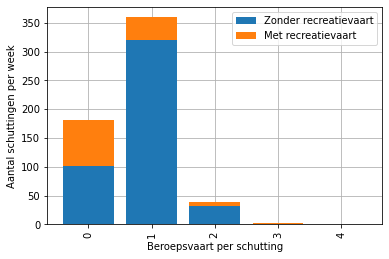

In [79]:
t = S[scenario].ships_per_leveling()

plotdata = pd.concat({
    'Zonder recreatievaart': t.iloc[:, t.columns < 1].sum(axis=1),
    'Met recreatievaart': t.iloc[:, t.columns >= 1].sum(axis=1),
}, axis=1)

plotdata = plotdata.reindex(np.arange(0, 5, 1))
plotdata.plot.bar(stacked=True, width=0.8, zorder=3)
plt.grid()
plt.xlabel('Beroepsvaart per schutting')
plt.ylabel('Aantal schuttingen per week')

plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schuttingen_beroepsvaart.csv')

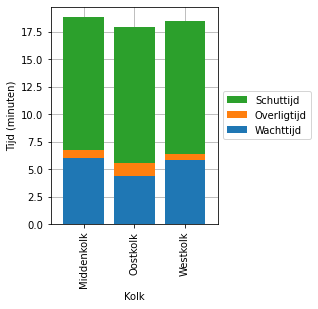

In [80]:
plotdata = (S[scenario].transit_times.groupby('Chamber')[['Waiting time (hours)',
       'Demurrage time (hours)',
       'Leveling time (hours)', ]].mean() *60)

plotdata.rename(columns={
    'Waiting time (hours)': 'Wachttijd',
    'Demurrage time (hours)': 'Overligtijd',
    'Leveling time (hours)': 'Schuttijd'
}, inplace=True)

plotdata.plot.bar(stacked=True, figsize=(3,4), width=0.8, zorder=3)

plt.gca().legend(*map(reversed, plt.gca().get_legend_handles_labels()), loc='center left',
                         bbox_to_anchor=(1, 0.5))
plt.ylabel('Tijd (minuten)')
plt.grid()
plt.xlabel('Kolk')

plt.savefig(    outputdir / 'Passeertijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd.csv')

In [81]:
plotdata = S[scenario].utilization(n_bins=5)

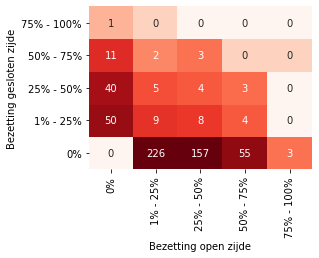

In [82]:
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(plotdata.T+ 1e-10, annot=True, fmt='.0f', cbar=False, vmax=100, vmin=0, norm=LogNorm(vmin=0.1, vmax=100), cmap='Reds')
plt.xlabel('Bezetting open zijde')
plt.ylabel('Bezetting gesloten zijde')
ax.invert_yaxis()

plt.savefig(    outputdir / 'Bezetting.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Bezetting.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Bezetting.csv')

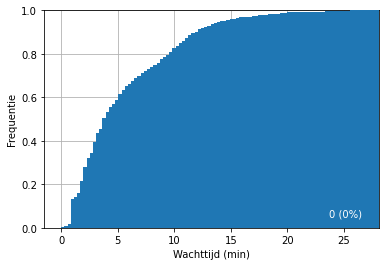

In [83]:
plotdata = S[scenario].transit_times['Waiting time (hours)']
plotdata = plotdata * 60

t_criterium = 30

plotdata.plot.hist(density=True, cumulative=True, bins=100, zorder=3)
plt.xlabel('Wachttijd (min)')
plt.axvline(t_criterium, c='k', ls=':', zorder=4)
plt.grid()
plt.ylabel('Frequentie')
plt.xlim(right=plotdata.max())
plt.ylim(0, 1)

n_above_criterium = (plotdata > t_criterium).sum() / S[scenario].replications
n_above_criterium_percentage = n_above_criterium / (plotdata.count() / S[scenario].replications)
plt.annotate(f'{n_above_criterium:.0f} ({n_above_criterium_percentage:.0%})', (0.95, 0.05), xycoords='axes fraction', ha='right', c='white')

plt.savefig(    outputdir / 'Wachttijd_verdeling.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Wachttijd_verdeling.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Wachttijd_verdeling.csv')

# Apply manual corrections

In [84]:
from copy import deepcopy

In [85]:
corrected = deepcopy(S[scenario])
corrected.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=1.5)
corrected.correction_leveling_without_utilization()

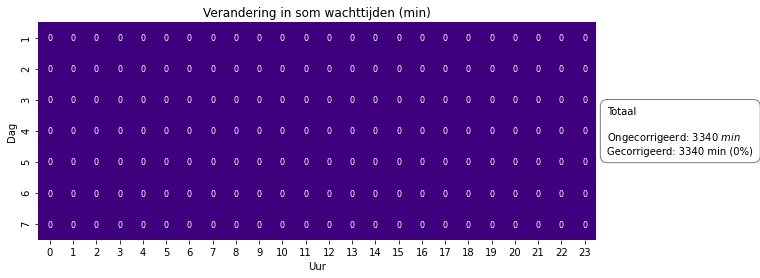

In [86]:
groupby_uncorrected = S[scenario].passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)
groupby_corrected = corrected.passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)

plotdata = groupby_corrected - groupby_uncorrected
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Purples_r', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in som wachttijden (min)')

plt.annotate(
    "Totaal\n\nOngecorrigeerd: {:.0f} $min$\nGecorrigeerd: {:.0f} min ({:.0%})".format(
    groupby_uncorrected.sum().sum(),
    groupby_corrected.sum().sum(),
    (groupby_corrected.sum().sum() / groupby_uncorrected.sum().sum()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')


plt.savefig(    outputdir / 'Correctie_wachttijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_wachttijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_wachttijd.csv')

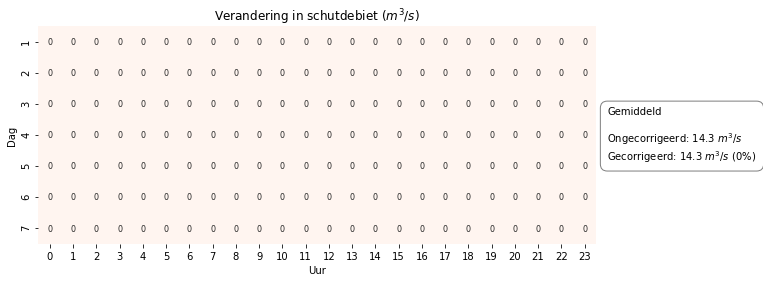

In [87]:
Q_corrected = corrected.waterloss_per_hour_per_day()
Q_uncorrected = S[scenario].waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Reds_r', annot=True, fmt='.0f', annot_kws={'size': 8}, vmin=-6, vmax=0)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:.0%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_schutdebiet.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_schutdebiet.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_schutdebiet.csv')

In [88]:
water_plane = {
    'Born':{
        'Westkolk': 136 * 16,
        'Middenkolk': 242*16,
        'Oostkolk': 154*16, 
        },
    'Maasbracht': {
        'Westkolk': 157 * 16,
        'Middenkolk': 157 * 16,
        'Oostkolk': 245 * 16
    },
    'Heel': {
        'Westkolk': 154*15.5,
        'Oostkolk': 246 * 13.5
    }
}

In [89]:
dH = {
    'Born': 11.35,
    'Maasbracht': 11.85,
    'Heel': 6.7
}

In [90]:
corrected_2 = deepcopy(corrected)
corrected_2.correction_waterloss(water_plane=water_plane[lock], dH=dH[lock], downward_leveling_side=1, correct_ship_volume=False)

In [91]:
corrected_3 = deepcopy(corrected)
corrected_3.correction_waterloss(water_plane=water_plane[lock], dH=dH[lock], downward_leveling_side=1, correct_ship_volume=True)

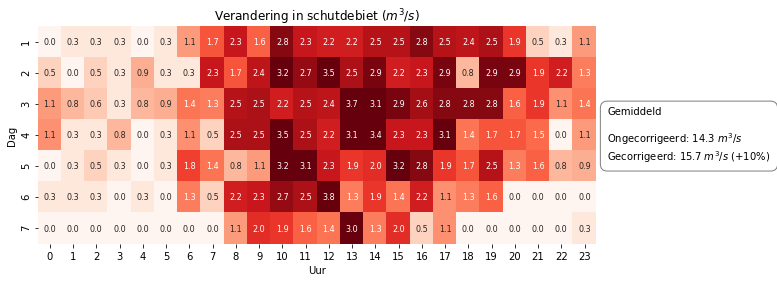

In [92]:
Q_corrected = corrected_2.waterloss_per_hour_per_day()
Q_uncorrected = corrected.waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Reds', annot=True, fmt='.1f', annot_kws={'size': 8}, vmin=0, vmax=3)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:+.0%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_kolkoppervlak.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_kolkoppervlak.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_kolkoppervlak.csv')

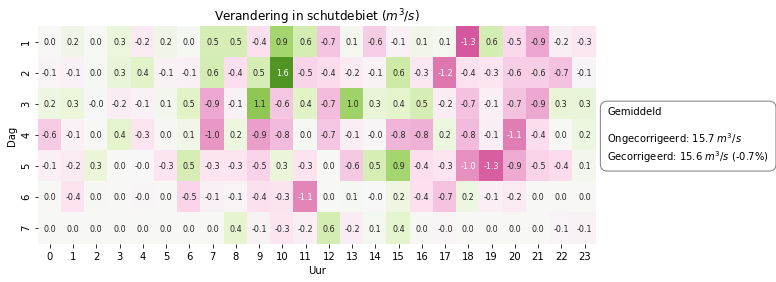

In [93]:
Q_corrected = corrected_3.waterloss_per_hour_per_day()
Q_uncorrected = corrected_2.waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='PiYG', annot=True, fmt='.1f', annot_kws={'size': 8}, vmin=-2, vmax=2)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:+.1%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_scheepsvolume.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_scheepsvolume.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_scheepsvolume.csv')

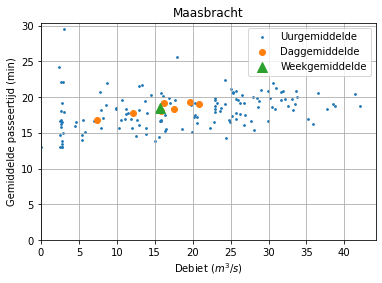

In [94]:
# Scatter per hour
T = corrected_3.passage_time_per_hour_per_day()
Q = corrected_3.waterloss_per_hour_per_day()

plt.scatter(Q.values, T.values, s=3, label='Uurgemiddelde')

# Scatter per day 
ships_per_hour = corrected_3.passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0) / T
ships_per_day = ships_per_hour.sum()

total_passage_time_per_day = corrected_3.passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0).sum()
mean_passage_time_per_day = total_passage_time_per_day / ships_per_day

mean_discharge_per_day = Q.mean().values

plt.scatter(mean_discharge_per_day, mean_passage_time_per_day, label='Daggemiddelde')

# Scatter per week
ships_per_week = ships_per_day.sum()
total_passage_time_per_week = total_passage_time_per_day.sum()

mean_passage_time_per_week = total_passage_time_per_week / ships_per_week
mean_discharge_per_week = Q.mean().mean()

plt.scatter(mean_discharge_per_week, mean_passage_time_per_week, marker='^', s=100, label='Weekgemiddelde')

plt.xlim(0)
plt.ylim(0)
plt.xlabel('Debiet ($m^3/s$)')
plt.ylabel('Gemiddelde passeertijd (min)')
plt.grid(c='#AAA')
plt.title(lock)
plt.legend()

plt.savefig(    outputdir / 'Debiet_passeertijd_peruur.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Debiet_passeertijd_peruur.svg', bbox_inches='tight')

In [110]:
schuttingen = corrected_3.levelings.loc[1]

In [108]:
for i_leveling, s in schuttingen.sort_values('Start Leveling').iterrows():
    
    # Find closest 'other leveling'
    schuttingen.drop(i_leveling)['Side'] != s['Side']
    
    s['Side']

In [111]:
schuttingen

,Lock,Lock Chamber,Leveling ID,Side,Nb of Ships,Utilization open side (%),Utilization closed side (%),Waterloss (m3),Total Duration (hours),Start Sailing In (hour),Start Doors Closing,Start Leveling,Start Doors Opening,Start Sailing Out,End Sailing Out,Total Ship Volume (m3)
Lock Leveling ID,,,,,,,,,,,,,,,,
1,Sluis Maasbracht,Westkolk,1,1,1,24.63,0.00,-1174.154337,0.2339,4.2122,2014-01-01 04:14:41,2014-01-01 04:16:11,2014-01-01 04:23:11,2014-01-01 04:24:41,2014-01-01 04:26:46,-1174.154337
4,Sluis Maasbracht,Westkolk,2,2,1,53.91,0.00,32023.190166,0.2963,5.7069,2014-01-01 05:47:50,2014-01-01 05:49:20,2014-01-01 05:56:20,2014-01-01 05:57:50,2014-01-01 06:00:12,2255.990166
2,Sluis Maasbracht,Middenkolk,1,1,0,0.00,32.14,0.000000,6.0130,0.0250,2014-01-01 05:52:17,2014-01-01 05:53:47,2014-01-01 06:00:47,2014-01-01 06:02:17,2014-01-01 06:02:17,-0.000000
6,Sluis Maasbracht,Middenkolk,2,2,1,32.14,0.00,31435.899533,0.2703,6.0380,2014-01-01 06:06:32,2014-01-01 06:08:02,2014-01-01 06:15:02,2014-01-01 06:16:32,2014-01-01 06:18:30,1668.699533
7,Sluis Maasbracht,Middenkolk,3,1,0,0.00,24.91,0.000000,0.1667,6.3083,2014-01-01 06:18:30,2014-01-01 06:20:00,2014-01-01 06:27:00,2014-01-01 06:28:30,2014-01-01 06:28:30,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Sluis Maasbracht,Middenkolk,235,1,2,2.84,0.00,-52.598756,0.2784,159.4256,2014-01-07 15:30:14,2014-01-07 15:31:44,2014-01-07 15:38:44,2014-01-07 15:40:14,2014-01-07 15:42:14,-52.598756
580,Sluis Maasbracht,Westkolk,236,2,1,67.26,0.00,33163.604326,0.2927,159.8722,2014-01-07 15:57:36,2014-01-07 15:59:06,2014-01-07 16:06:06,2014-01-07 16:07:36,2014-01-07 16:09:54,3396.404326
582,Sluis Maasbracht,Middenkolk,236,2,1,32.77,0.00,31401.840912,0.2689,160.1624,2014-01-07 16:13:56,2014-01-07 16:15:26,2014-01-07 16:22:26,2014-01-07 16:23:56,2014-01-07 16:25:53,1634.640912
